In [12]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt



In [13]:
import pandas as housing


In [14]:
housing = pd.read_csv('House-Prices-Netherlands.csv', index_col=0, encoding='unicode-escape')
housing.head()

,Address,Zip,Price,Area,Room,Longitude,Latitude
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Address    924 non-null    object 
 1   Zip        924 non-null    object 
 2   Price      920 non-null    float64
 3   Area       924 non-null    int64  
 4   Room       924 non-null    int64  
 5   Longitude  924 non-null    float64
 6   Latitude   924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


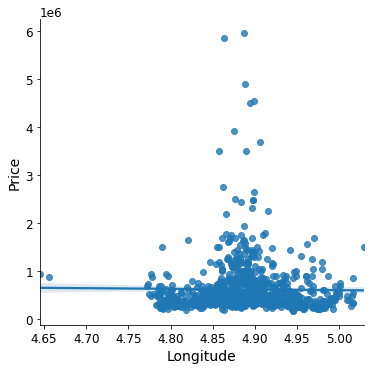

In [16]:
sns.lmplot(x='Longitude', y='Price', data=housing)
plt.show()

Saving figure attribute_histogram_plots


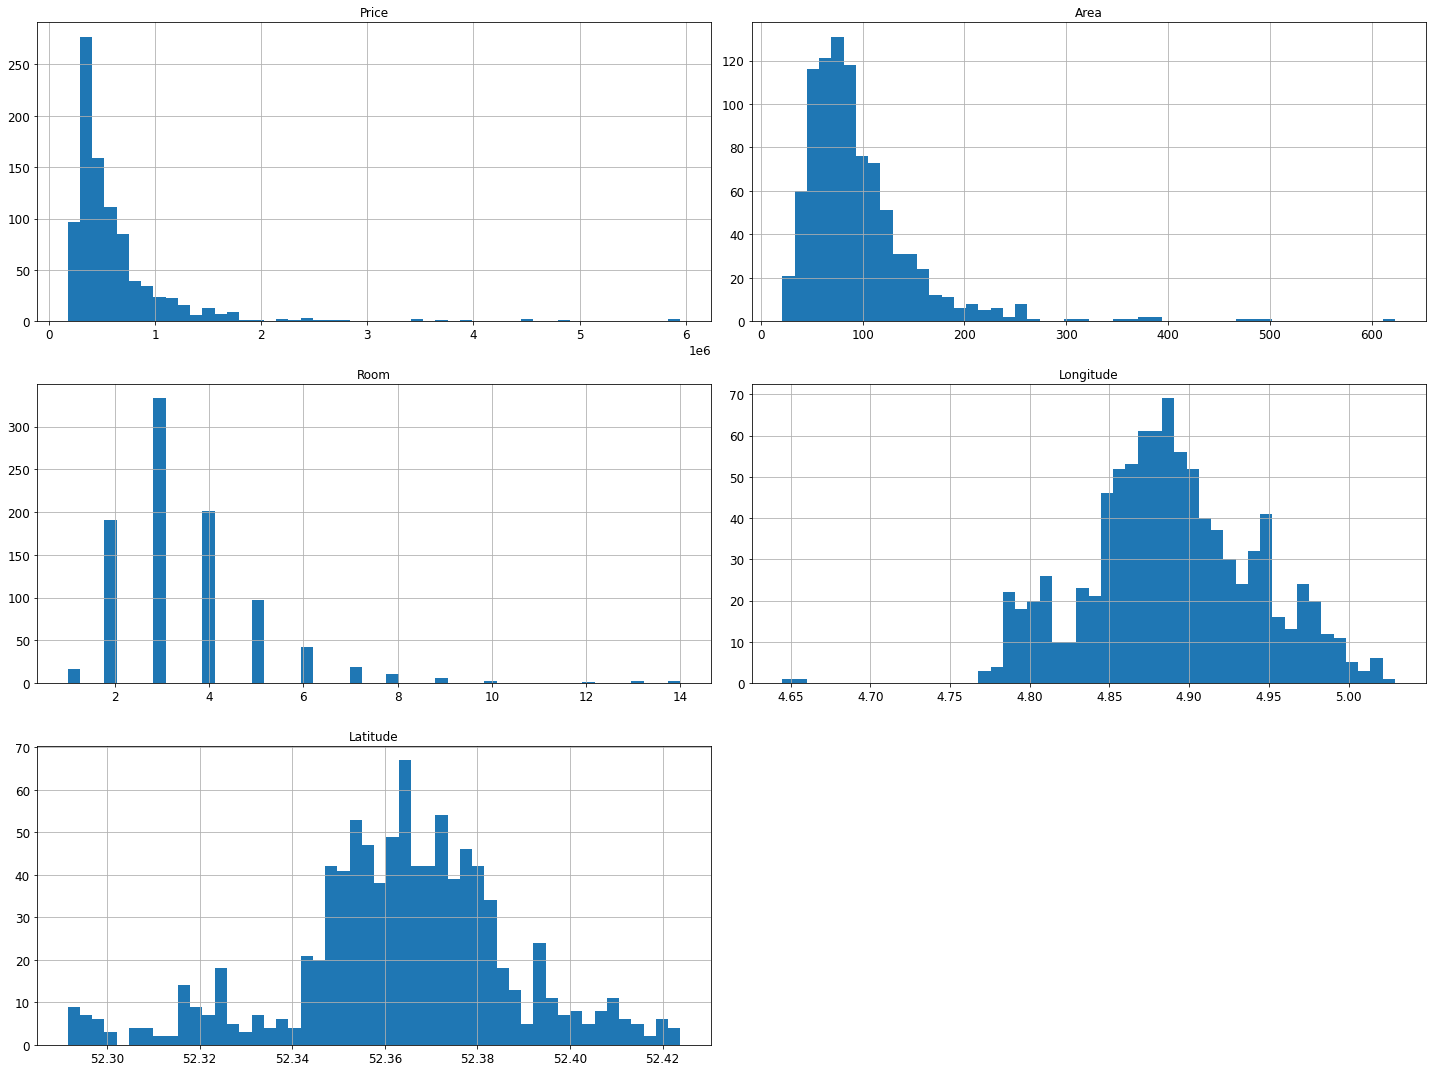

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#### Create a Test Set


In [18]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [19]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)



740

In [21]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



###### The implementation of test_set_check() above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:


In [22]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

####  If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:



In [23]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [24]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [25]:
# housing_with_id[""] = housing["Longitude"] * 1000 + housing["Latitude"]
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "")

In [26]:
test_set.head()


,index,Address,Zip,Price,Area,Room,Longitude,Latitude
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
10,11,"Sloterkade 152 1, Amsterdam",1058 HN,540000.0,69,3,4.851985,52.351244
19,20,"Oostzaanstraat 271, Amsterdam",1013 WJ,375000.0,52,3,4.872555,52.392426
22,23,"Thorn Prikkerstraat 93, Amsterdam",1062 BS,600000.0,114,4,4.837666,52.362011


In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
test_set.head()


,Address,Zip,Price,Area,Room,Longitude,Latitude
324,"Claus van Amsbergstraat 45, Amsterdam",1102 AZ,450000.0,120,5,4.956167,52.317822
862,"Narva-eiland 171, Amsterdam",1014 ZJ,475000.0,61,3,4.881701,52.393538
31,"Churchill-laan 37 A, Amsterdam",1078 DE,800000.0,98,3,4.900342,52.346366
838,"Oranje Nassaulaan 9, Amsterdam",1075 AH,5850000.0,480,14,4.863729,52.354874
295,"Amstel 75 F, Amsterdam",1018 EK,700000.0,88,5,4.902826,52.363883


### Visualizing Geographical Data


<AxesSubplot:>

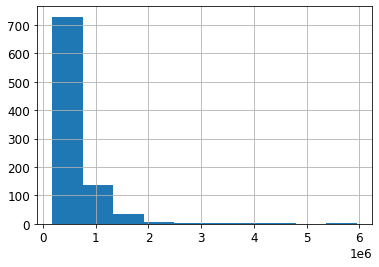

In [29]:
housing["Price"].hist()


Saving figure bad_visualization_plot


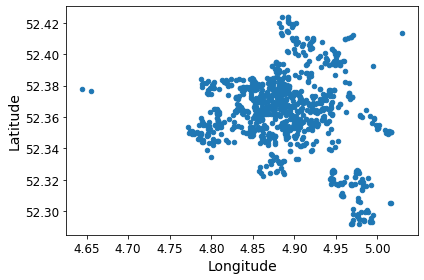

In [30]:
housing.plot(kind="scatter", x="Longitude", y="Latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


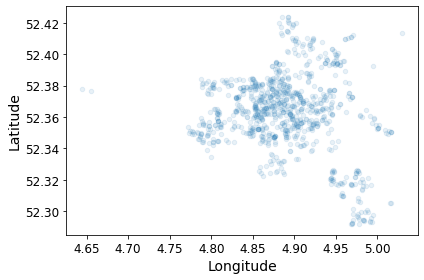

In [31]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)
save_fig("better_visualization_plot")


Saving figure housing_prices_scatterplot


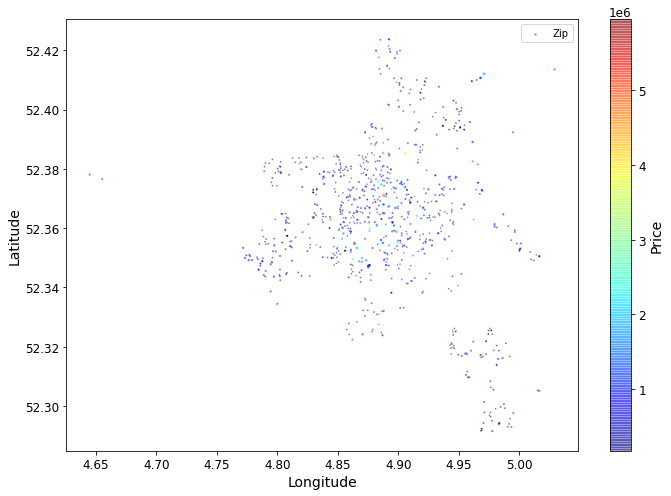

In [37]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=housing["Area"]/100, label="Zip", figsize=(10,7),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")



### Looking for Correlations


In [39]:
corr_matrix = housing.corr()


In [40]:
corr_matrix["Price"].sort_values(ascending=False)


Price        1.000000
Area         0.835090
Room         0.623448
Latitude     0.062196
Longitude   -0.013561
Name: Price, dtype: float64